# Omphemetse Mangope
Student No: 201532614  
Advanced Machine Learning  
Assignment 3

In [178]:
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import numpy as np
from sklearn.model_selection import train_test_split
import math

In [179]:
data = pd.read_csv("weightdataset.csv", sep=';')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Choose input and output variable 

In [180]:
X_i = data['Weight']
Y_i = data['Height']

# Input and output variable plot

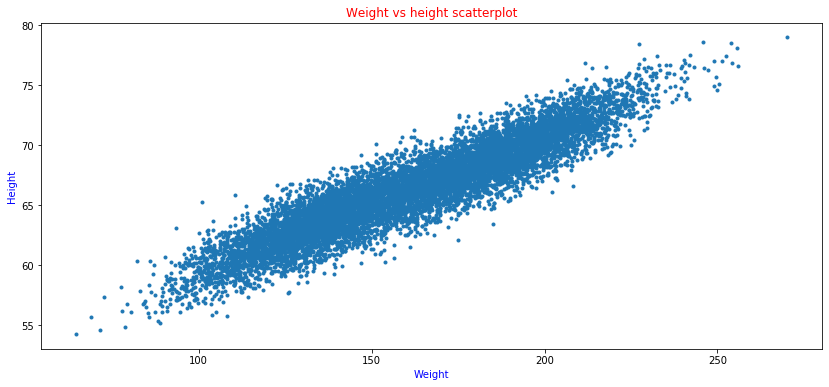

In [181]:
plt.figure(figsize=(14,6))
plt.plot(X_i,Y_i,'.')
plt.title('Weight vs height scatterplot', color='red')
plt.xlabel('Weight',color='blue')
plt.ylabel('Height',color='blue')
plt.show()

# Data Standardization

In [182]:
X_i = preprocessing.scale(X_i)
Y_i = preprocessing.scale(Y_i)

# Data Splitting

In [183]:
x_train,x_test,y_train,y_test = train_test_split(X_i,Y_i, test_size=.3)

# Build neural network

In [184]:
w_i = np.random.randn(2,1) # Setting initial weights for input and bias
bias = np.random.rand(1) # bias term
lr = .001 # Learning_rate for step-size
epochs = 30 # number of iterations 


# Sigmoid activation function
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

# derivative of the sigmoid function
def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def Gradient_descent(w_i,bias,lr): # Gradient descent function for updating weights
    
    error_values = []
    w_i_updates = []
    updated_bias = []
    
    
    
    for i in range(epochs):
    
        x = x_train.reshape(len(x_train),1)
        y = y_train
        
        
    
        xW = np.dot(x, w_i[1]) + bias*w_i[0] #output without sigmoid 
    
        z = sigmoid(xW) # predicted output
        
        
        # Negative log likelihood loss function 
        error_ouput = np.sum(-z * x * w_i[0].T) + np.sum(np.exp(x * w_i[0].T))+ np.sum(np.log(z))
        #print(error_ouput.sum())
    
        error = z - y
        
        error_values.append(error) # error values to be collected during training  
        
        
    
        dcost_dpred = error
       
        
        dpred_dz = sigmoid_der(z) # derivative of sigmoid output

        z_delta = dcost_dpred * dpred_dz

        x = x_train.T 
        
        w_i -= lr * np.dot(x, z_delta) # weight updates
        w_i_updates.append(w_i)

        for num in z_delta:
            bias -= lr * num # bias term update
        updated_bias.append(bias)
        
        
            
        
    
    return(error_values,w_i_updates,updated_bias) # return values

# Get best model parameters

In [185]:
error_values,w_i_updates,updated_bias = Gradient_descent(w_i,bias,lr) # extracting return values
w_i_updates = w_i_updates[-1] # getting the best weights for input and bias term, each having one weight parameter
updated_bias = updated_bias[-1] # getting the best updated bias term values

print("Updated Bias:",updated_bias) 
print('Updated_weights:',w_i_updates) 

Updated Bias: [-2.02233834]
Updated_weights: [[45.96059046]
 [45.08005779]]


In [186]:
#error = sum(error_values) 

# Cost function plot 

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Cost Function')
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.plot(error_values)
plt.show()